# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

Geef hier de natuurkundige achtergrond van het onderwerp. 

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [18]:
# Hier de data en de analyse
#op de weerstand in het water, stel hem in op 30 Watt
#Laat de themometer in het water zitten
#Sluit de weerstand aan op de voeding
#Zet de voeding aan, start de tijdmeting
#Meet de temperatuur elke 5 seconden, totdat de temperatuur 70 graden is
#Zet de voeding uit, stop de tijdmeting
#Noteer de tijd wanneer de temperatuur 70 graden is
#Herhaal dit voor verschillende massa's water (100g, 200g, 300g, 400g, 500g)
#Analyseer de data met behulp van de formule Q=mcΔT en P=Q/t om de specifieke warmtecapaciteit van water te berekenen.
#Succes!

Begin temperatuur: 21.56 °C
Gemiddelde stijging: 0.02811 °C/s ± 0.00023
Soortelijke warmte: 5292 J/(kg·K) ± 43


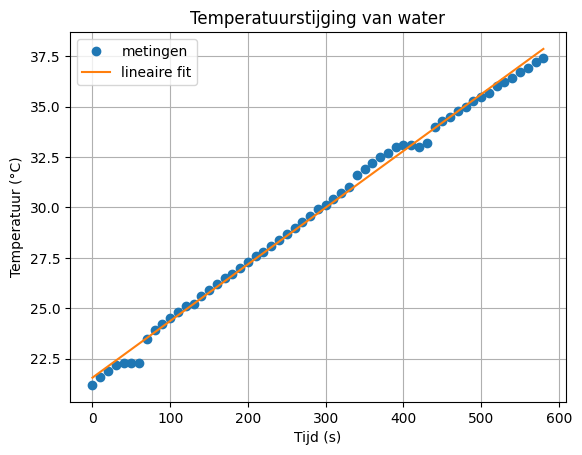

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

temperatuur = np.array([
    21.2, 21.6, 21.9, 22.2, 22.3, 22.3, 22.3, 23.5, 23.9, 24.2,
    24.5, 24.8, 25.1, 25.2, 25.6, 25.9, 26.2, 26.5, 26.7, 27.0,
    27.3, 27.6, 27.8, 28.1, 28.4, 28.7, 29.0, 29.3, 29.6, 29.9,
    30.1, 30.4, 30.7, 31.0, 31.6, 31.9, 32.2, 32.5, 32.7, 33.0,
    33.1, 33.1, 33.0, 33.2, 34.0, 34.3, 34.5, 34.8, 35.0, 35.3,
    35.5, 35.7, 36.0, 36.2, 36.4, 36.7, 36.9, 37.2, 37.4
])

tijd = np.arange(len(temperatuur)) * 10   

vermogen = 29.75   # Watt
massa = 0.200      # kg 

def rechte_lijn(t, T0, stijging):
    return T0 + stijging * t

# curve fit over alle meetpunten
popt, pcov = curve_fit(rechte_lijn, tijd, temperatuur)
T0_fit, stijging_fit = popt

# bereken soortelijke warmte
c_fit = vermogen / (massa * stijging_fit)

# fitfout
stijging_err = np.sqrt(np.diag(pcov))[1]
c_err = vermogen / (massa * stijging_fit**2) * stijging_err

print(f"Begin temperatuur: {T0_fit:.2f} °C")
print(f"Gemiddelde stijging: {stijging_fit:.5f} °C/s ± {stijging_err:.5f}")
print(f"Soortelijke warmte: {c_fit:.0f} J/(kg·K) ± {c_err:.0f}")

# plotten
plt.plot(tijd, temperatuur, 'o', label='metingen')
plt.plot(tijd, rechte_lijn(tijd, *popt), '-', label='lineaire fit')
plt.xlabel('Tijd (s)')
plt.ylabel('Temperatuur (°C)')
plt.title('Temperatuurstijging van water')
plt.legend()
plt.grid(True)
plt.show()

# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.

In [7]:
#Er is onderzoek gedaan naar de warmtecapaciteit van water. De bepaalde warmtecapaciteit is 5292 J/(kg·K). Dit zou kunnen komen  door warmteverlies aan de omgeving tijdens het experiment. Ook is te zien  dat er in de grafiek twee knikken zitten. Dit heeft te maken met het uitgaan van de centrifuge. dat is namelijk twee keer gebeurt tijdens de metingen en kan dus invloed hebben op de resultaten. 